<a href="https://colab.research.google.com/github/johnatanDM/bootcamp-datascience-alura/blob/main/M%C3%B3dulo%202%20-%20VISUALIZA%C3%87%C3%83O%20DE%20DADOS%20COM%20SEABORN%20E%20MATPLOTLIB/Bootcamp_Data_Science_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos fazer uma análise nos dados do DATASUS, trabalhando com os dados financeiros do SUS.

#Módulo 1 - PYTHON E PANDAS PARA ANÁLISE DE DADOS REAIS

##Aula 1

Primeiro vamos importar as bibliotecas que nos ajudarão na nossa análise:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from io import StringIO
import requests
import seaborn as sns

In [2]:
!pip freeze > requirements.txt

Importando os dados no github da Alura, preparado para o bootcamp:

In [3]:
dados = pd.read_csv("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A151346189_28_143_208.csv", 
                    delimiter=';', 
                    encoding = "ISO-8859-1",
                    skiprows=3,
                    skipfooter=12,
                    decimal=",",
                    thousands=".", 
                    engine='python')
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,3.068430e+06,2.825839e+06,2.931174e+06,2.885269e+06,2.860104e+06,3.684945e+06,3.607290e+06,3.774357e+06,3.706712e+06,3.763188e+06,3.533626e+06,3605007.43,3.907033e+06,3.939821e+06,3.901084e+06,3.684407e+06,3.623016e+06,3.890462e+06,4.193534e+06,4.534401e+06,4.451208e+06,4.874593e+06,4.460802e+06,5.067886e+06,4.511093e+06,4.394680e+06,4.098742e+06,4.411499e+06,3.868618e+06,4.298703e+06,...,7.948292e+06,8.438077e+06,7.656645e+06,8.047743e+06,8.657206e+06,8.150894e+06,7.507845e+06,7.998346e+06,8.893684e+06,8.867793e+06,8.871408e+06,8.501602e+06,8.315108e+06,8.525500e+06,9.177611e+06,7.368996e+06,8.835095e+06,8.328187e+06,8.408513e+06,9.351706e+06,8.143008e+06,8.949742e+06,9.630553e+06,9.581970e+06,7.891114e+06,9.792371e+06,9.170788e+06,8.816847e+06,1.002455e+07,9.675424e+06,8.085026e+06,9.221412e+06,7.493311e+06,8.092260e+06,7.273844e+06,7.652120e+06,8.725531e+06,1.115211e+07,10285455.78,9.291297e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,1.923887e+06,1.756987e+06,2.235640e+06,2.497116e+06,2.253558e+06,2.122674e+06,2.834318e+06,2.722066e+06,2.432832e+06,2.630191e+06,2.307579e+06,-,2.826477e+06,2.170791e+06,2.541526e+06,2.491042e+06,1.954474e+06,2.389996e+06,2.654879e+06,2.844085e+06,2.336207e+06,2.125143e+06,2.430294e+06,2.377738e+06,2.184747e+06,2.468453e+06,2.516285e+06,3.051370e+06,2.629104e+06,2.485452e+06,...,2.397513e+06,2.348760e+06,3.139155e+06,2.765063e+06,4.540085e+06,4.120229e+06,2.610455e+06,3.576595e+06,2.444567e+06,2.602434e+06,3.064163e+06,2.276237e+06,3.239474e+06,3.126430e+06,2.998866e+06,2.619710e+06,3.018049e+06,3.342614e+06,2.123426e+06,2.664655e+06,1.906430e+06,3.096440e+06,2.411628e+06,2.840631e+06,3.260154e+06,3.250723e+06,3.204999e+06,3.052746e+06,3.124802e+06,3.021522e+06,2.874871e+06,3.331804e+06,3.417691e+06,3.076003e+06,2.286643e+06,2.896340e+06,3.045246e+06,3.915193e+06,-,4.206680e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,8.618319e+06,6.555549e+06,7.777646e+06,7.403068e+06,6.683347e+06,9.927781e+06,8.844511e+06,9.079036e+06,8.832895e+06,9.373396e+06,9.578326e+06,9730634.16,9.179253e+06,8.314649e+06,9.050439e+06,9.419461e+06,8.680179e+06,9.168055e+06,9.897902e+06,9.651362e+06,1.085460e+07,1.041712e+07,8.718347e+06,8.221592e+06,9.613977e+06,9.927574e+06,9.470661e+06,9.736751e+06,8.745260e+06,9.380112e+06,...,1.278964e+07,1.437699e+07,1.424007e+07,1.359465e+07,1.458429e+07,1.315872e+07,1.316966e+07,1.357226e+07,1.308308e+07,1.432231e+07,1.464334e+07,1.463221e+07,1.450052e+07,1.484053e+07,1.442762e+07,1.581896e+07,1.635846e+07,1.539116e+07,1.415436e+07,1.679140e+07,1.436999e+07,1.633902e+07,1.562291e+07,1.648317e+07,1.542224e+07,1.596199e+07,1.578790e+07,1.651544e+07,1.573120e+07,1.574461e+07,1.434655e+07,1.601846e+07,1.491375e+07,1.506830e+07,1.350958e+07,1.965859e+07,2.089754e+07,1.934645e+07,14726443.67,1.771655e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+06,1.056219e+06,1.244339e+06,1.08

In [4]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [5]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.4

Média de gastos das unidades federativas em cada mês.

In [6]:
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

Corrigindo a forma de apresentação dos números no pandas

In [7]:
pd.options.display.float_format = "{:.2f}".format

In [8]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

A média de gastos no mês de Agosto de 2008

In [9]:
dados["2008/Ago"].mean()

27800320.306666665

###Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

Vamos plotar um gráfico para visualizar os gastos por unidade federativa no mês de Agosto de 2008

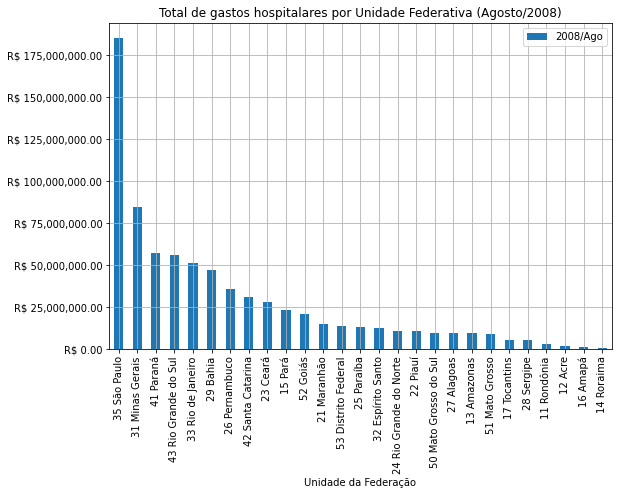

In [10]:
ax = dados.sort_values(by='2008/Ago', ascending=False).plot(x='Unidade da Federação',
                                                            y='2008/Ago', 
                                                            kind='bar', 
                                                            figsize=(9,6), 
                                                            grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares por Unidade Federativa (Agosto/2008)')
plt.show()

###Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [11]:
dados['2020/Ago'].replace('-', np.nan, inplace=True)
dados['2020/Ago'] = dados['2020/Ago'].astype('float64')

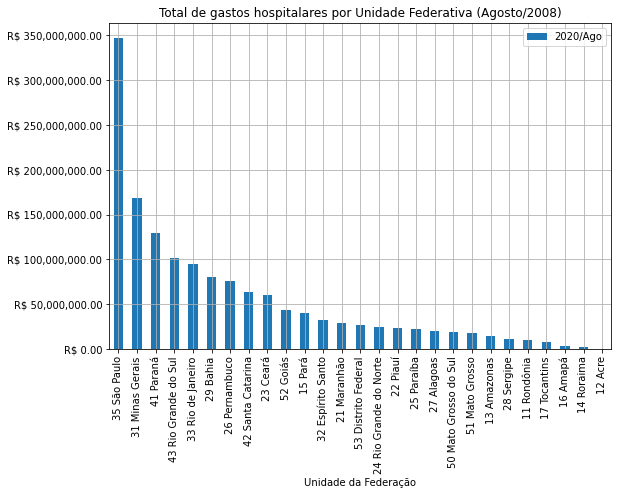

In [12]:
ax = dados.sort_values(by='2020/Ago', ascending=False).plot(x='Unidade da Federação',
                                                            y='2020/Ago', 
                                                            kind='bar', 
                                                            figsize=(9,6), 
                                                            grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares por Unidade Federativa (Agosto/2008)')
plt.show()

##Aula 2

Importar o novo arquivo

In [13]:
dados2 = pd.read_csv("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A160324189_28_143_208.csv", 
                    delimiter=';', 
                    encoding = "ISO-8859-1",
                    skiprows=3,
                    skipfooter=12,
                    decimal=",",
                    thousands=".", 
                    engine='python')
dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


Mostrando dois meses

In [14]:
dados2[['2018/Ago', '2018/Set']]

,2018/Ago,2018/Set
0,9124967.84,8406732.72
1,3040645.05,2926179.27
2,16374961.41,15343340.93
3,3328230.63,2878691.04
4,35618364.04,34380916.90
5,2408659.24,2369223.52
6,5514866.91,5486178.29
7,30838532.57,29976987.17
8,16550617.02,15762154.38
9,51376446.25,46560335.78


Pegando apenas as colunas que contém todos os dados

In [15]:
colunas_usaveis = dados2.mean().index.to_list()
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [16]:
dados_usaveis = dados2[colunas_usaveis]
dados_usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

mudar o indice pra ser o nome do mês

In [17]:
dados_usaveis = dados_usaveis.set_index('Unidade da Federação')

In [18]:
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

###Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

plotar um gráfico do custo dos estados

In [19]:
dados_usaveis = dados_usaveis.drop('Total', axis=1)

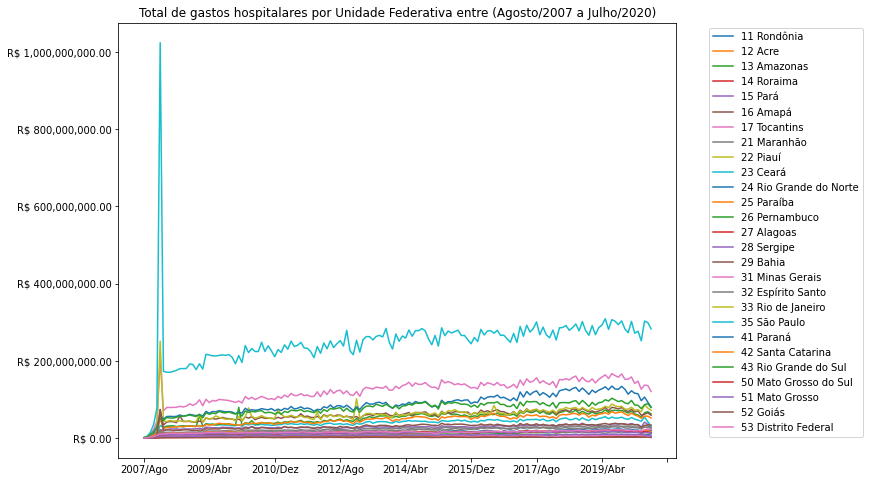

In [20]:
ax = dados_usaveis.T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares por Unidade Federativa entre (Agosto/2007 a Julho/2020)')
plt.show()

###Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

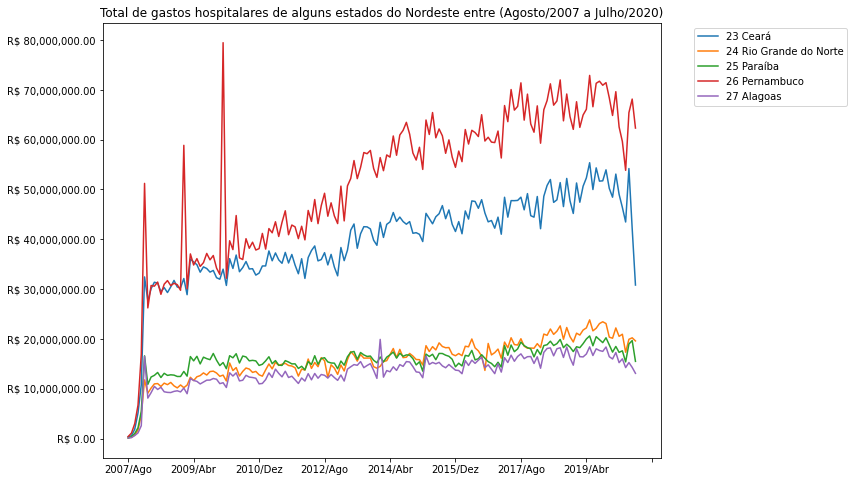

In [21]:
alguns_estados = dados_usaveis.loc[['23 Ceará', '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas']]
ax = alguns_estados.T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares de alguns estados do Nordeste entre (Agosto/2007 a Julho/2020)')
plt.show()

##Aula 3

###Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [22]:
regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
estados = dados_usaveis.index
dados_usaveis["Regioes"] = list(map(lambda estado: regioes[estado[0]] , estados))

In [23]:
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,

###Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

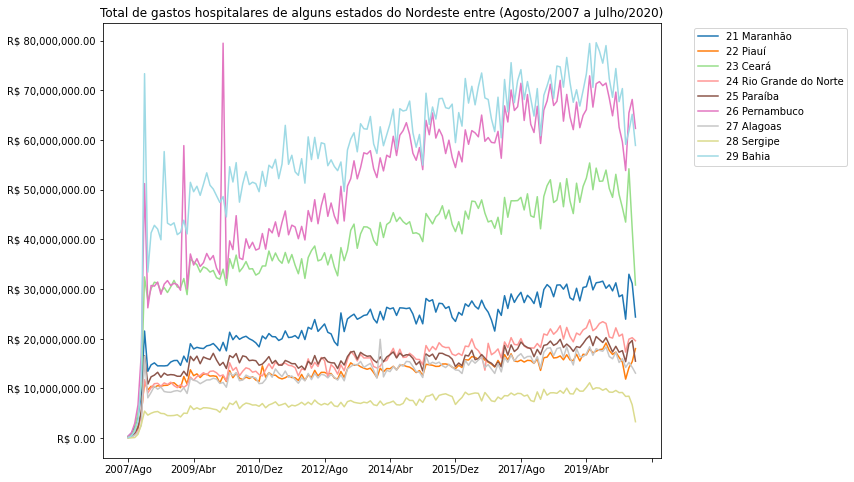

In [24]:
nordeste = dados_usaveis.query("Regioes == 'Nordeste'").loc[:, dados_usaveis.columns != 'Regioes']
ax = nordeste.T.plot(figsize=(10,8), cmap=plt.get_cmap('tab20'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares de alguns estados do Nordeste entre (Agosto/2007 a Julho/2020)')
plt.show()

plotar os 5 primeiros

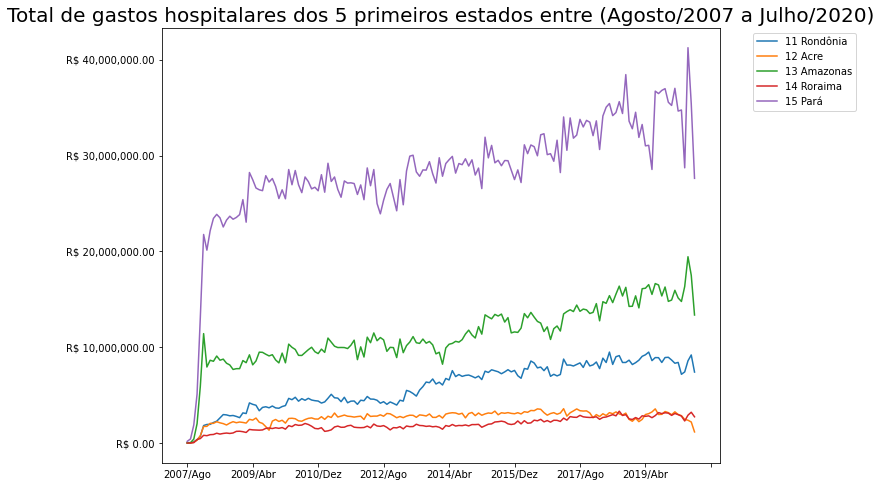

In [25]:
ax = dados_usaveis[:5].loc[:, dados_usaveis.columns != 'Regioes'].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares dos 5 primeiros estados entre (Agosto/2007 a Julho/2020)', fontsize=20)
plt.show()

Definir seed

In [26]:
np.random.seed(42)

plotar amostra de 7 estados

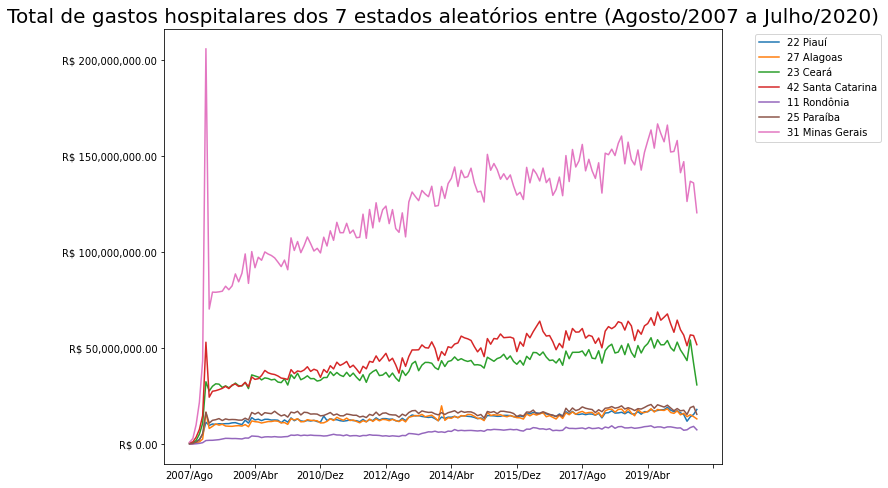

In [27]:
ax = dados_usaveis.sample(7).loc[:, dados_usaveis.columns != 'Regioes'].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Total de gastos hospitalares dos 7 estados aleatórios entre (Agosto/2007 a Julho/2020)', fontsize=20)
plt.show()

###Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

Retirar os meses anteriores a 2007/Fev

In [28]:
colunas_usaveis = dados_usaveis.columns
dados_usaveis = dados_usaveis[colunas_usaveis[6:]]
dados_usaveis.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,...,2761536.23,

Ordenar pelo total gasto e separar os 5 que mais gastam.

In [29]:
colunas_meses = dados_usaveis.columns[:-1]
dados_meses = dados_usaveis[colunas_meses]
estados_mais_gastam = dados_meses.T.sum().sort_values(ascending=False).index[:5].values
estados_mais_gastam = dados_usaveis.loc[estados_mais_gastam]
estados_mais_gastam.T

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77
...,...,...,...,...,...
2020/Abr,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35
2020/Mai,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16
2020/Jun,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21
2020/Jul,282709570.31,120467187.34,80320852.69,78929703.81,71540227.33


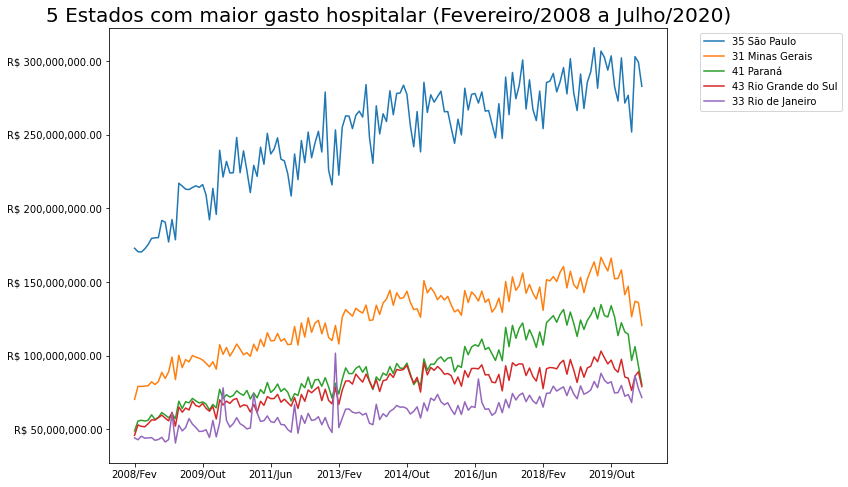

In [30]:
ax = estados_mais_gastam.loc[:, dados_usaveis.columns != 'Regioes'].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('5 Estados com maior gasto hospitalar (Fevereiro/2008 a Julho/2020)', fontsize=20)
plt.show()

###Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

In [31]:
estados_mais_gastam_e_ceara = estados_mais_gastam.append(dados_usaveis.loc['23 Ceará'])
estados_mais_gastam_e_ceara

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.

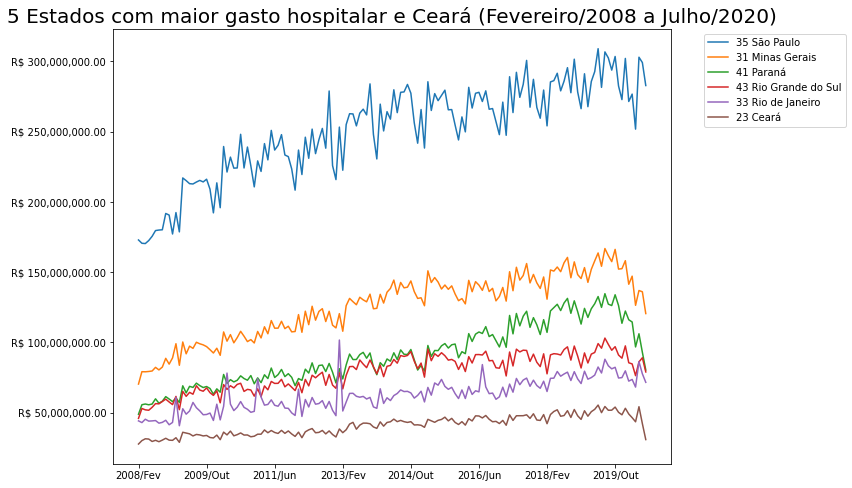

In [32]:
ax = estados_mais_gastam_e_ceara.loc[:, dados_usaveis.columns != 'Regioes'].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('5 Estados com maior gasto hospitalar e Ceará (Fevereiro/2008 a Julho/2020)', fontsize=20)
plt.show()

###Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

In [33]:
dados_dengue = pd.read_csv("https://raw.githubusercontent.com/johnatanDM/bootcamp-datascience-alura/main/Dados/A102115189_28_143_208.csv",
            delimiter=';', 
            encoding = "ISO-8859-1",
            skiprows=4,
            skipfooter=12,
            decimal=",",
            thousands=".", 
            engine='python')
dados_dengue = dados_dengue.set_index('Unidade da Federação')
dados_dengue

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,175,280,213,201,112,39,50,23,23,6,33,42,139,266,324,398,339,202,146,131,113,207,472,897,1394,1328,684,474,229,129,93,70,67,87,178,364,380,333,352,310,...,41,42,64,52,43,23,22,10,15,17,15,14,28,23,34,28,34,34,48,33,27,27,32,60,94,116,112,62,30,34,20,10,15,11,8,16,20,15,11,22386
12 Acre,6,8,8,16,15,7,16,13,6,6,7,7,36,72,95,137,84,54,42,19,-,23,16,40,85,119,177,98,54,77,13,17,10,28,30,55,111,126,101,63,...,12,12,11,19,11,12,9,7,7,29,24,35,40,34,48,8,20,16,20,9,12,16,46,77,65,80,33,34,20,4,9,-,7,5,18,41,105,84,86,4793
13 Amazonas,63,234,217,224,123,119,48,19,9,6,6,17,23,28,43,38,40,22,26,11,13,8,8,9,8,10,17,27,55,55,72,75,69,75,56,119,183,399,735,468,...,4,2,3,5,5,14,6,4,4,2,2,5,5,6,8,12,5,13,6,3,1,7,13,45,52,53,39,27,15,21,15,20,11,14,20,35,26,50,92,6490
14 Roraima,3,9,25,52,78,97,133,140,124,150,66,67,74,103,116,65,106,46,49,51,81,50,38,30,32,56,145,166,160,200,187,87,78,37,26,26,34,22,18,16,...,1,3,-,2,-,-,-,4,2,-,3,2,2,3,13,8,2,3,3,6,5,15,25,25,25,21,14,4,1,1,-,2,-,-,-,-,-,-,-,4069
15 Pará,968,1113,1237,1395,1206,777,535,272,219,207,269,364,416,586,762,750,536,530,444,251,143,124,133,173,289,321,557,645,685,578,488,527,684,609,677,957,1153,1465,1402,1211,...,64,77,109,125,106,82,43,46,39,54,44,56,82,123,136,146,175,90,66,56,56,49,67,34,94,149,155,100,48,17,10,13,10,7,10,17,11,34,27,50949
16 Amapá,4,18,12,27,15,13,12,12,24,15,13,9,4,25,25,29,23,18,5,10,9,6,6,3,4,9,15,7,11,17,22,44,18,19,23,23,32,47,32,46,...,1,3,8,14,6,2,2,2,4,4,4,2,3,1,2,-,3,2,2,1,-,4,2,1,2,-,2,1,1,1,-,-,-,-,-,-,-,-,1,1615
17 Tocantins,127,217,233,257,271,123,60,21,18,6,9,22,60,104,139,96,137,124,81,35,20,39,31,80,145,175,175,208,217,132,78,41,16,14,59,80,120,90,121,115,...,7,13,18,18,28,12,5,7,3,8,8,16,72,121,85,102,72,76,31,24,18,10,3,6,19,28,12,12,15,9,9,1,1,1,1,2,-,-,2,9706
21 Maranhão,181,214,348,617,635,426,272,139,102,49,63,63,100,191,244,302,400,372,199,98,75,66,64,78,117,152,234,361,326,326,294,302,337,325,297,364,421,557,668,739,...,75,60,53,82,103,66,40,32,23,15,22,34,60,120,186,363,421,326,199,120,99,62,43,42,72,141,117,65,70,57,38,27,18,8,4,5,27,15,18,39176
22 Piauí,66,105,231,440,309,188,103,61,48,15,27,39,71,115,167,265,320,398,251,188,137,104,102,74,173,237,300,384,545,454,446,233,162,132,85,100,169,244,309,453,...,7,10,15,26,39,44,36,18,25,16,12,3,20,30,30,87,224,202,136,56,28,12,15,7,13,10,17,16,17,20,9,4,4,3,-,2,2,6,10,18918


In [34]:
dados_dengue.replace('-', 0, inplace=True)
dados_dengue = dados_dengue.astype('float')

Remover Coluna Total

In [35]:
dados_dengue.drop('Total', axis=1, inplace=True)

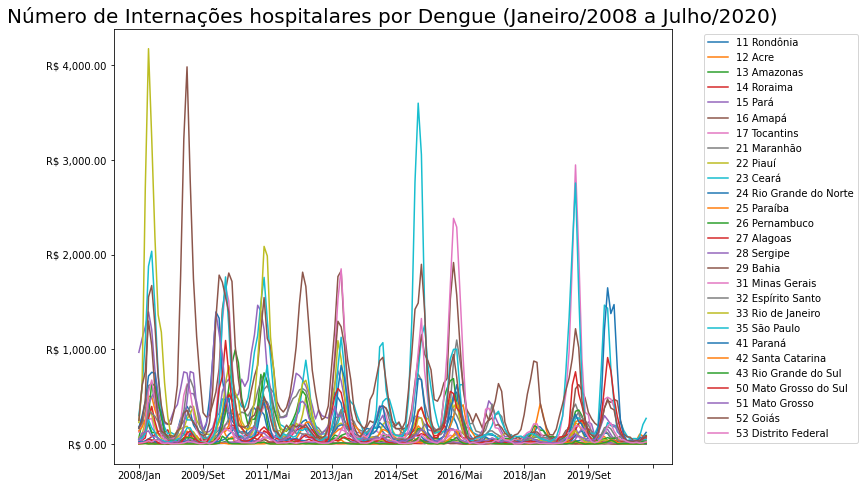

In [36]:
ax = dados_dengue.loc[:, dados_dengue.columns != 'Regioes'].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Número de Internações hospitalares por Dengue (Janeiro/2008 a Julho/2020)', fontsize=20)
plt.show()

Incluir coluna Região

In [37]:
estados = dados_usaveis.index
dados_dengue["Regioes"] = list(map(lambda estado: regioes[estado[0]] , estados))
dados_dengue.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,175.00,280.00,213.00,201.00,112.00,39.00,50.00,23.00,23.00,6.00,33.00,42.00,139.00,266.00,324.00,398.00,339.00,202.00,146.00,131.00,113.00,207.00,472.00,897.00,1394.00,1328.00,684.00,474.00,229.00,129.00,93.00,70.00,67.00,87.00,178.00,364.00,380.00,333.00,352.00,310.00,...,41.00,42.00,64.00,52.00,43.00,23.00,22.00,10.00,15.00,17.00,15.00,14.00,28.00,23.00,34.00,28.00,34.00,34.00,48.00,33.00,27.00,27.00,32.00,60.00,94.00,116.00,112.00,62.00,30.00,34.00,20.00,10.00,15.00,11.00,8.00,16.00,20.00,15.00,11.00,Norte
12 Acre,6.00,8.00,8.00,16.00,15.00,7.00,16.00,13.00,6.00,6.00,7.00,7.00,36.00,72.00,95.00,137.00,84.00,54.00,42.00,19.00,0.00,23.00,16.00,40.00,85.00,119.00,177.00,98.00,54.00,77.00,13.00,17.00,10.00,28.00,30.00,55.00,111.00,126.00,101.00,63.00,...,12.00,12.00,11.00,19.00,11.00,12.00,9.00,7.00,7.00,29.00,24.00,35.00,40.00,34.00,48.00,8.00,20.00,16.00,20.00,9.00,12.00,16.00,46.00,77.00,65.00,80.00,33.00,34.00,20.00,4.00,9.00,0.00,7.00,5.00,18.00,41.00,105.00,84.00,86.00,Norte
13 Amazonas,63.00,234.00,217.00,224.00,123.00,119.00,48.00,19.00,9.00,6.00,6.00,17.00,23.00,28.00,43.00,38.00,40.00,22.00,26.00,11.00,13.00,8.00,8.00,9.00,8.00,10.00,17.00,27.00,55.00,55.00,72.00,75.00,69.00,75.00,56.00,119.00,183.00,399.00,735.00,468.00,...,4.00,2.00,3.00,5.00,5.00,14.00,6.00,4.00,4.00,2.00,2.00,5.00,5.00,6.00,8.00,12.00,5.00,13.00,6.00,3.00,1.00,7.00,13.00,45.00,52.00,53.00,39.00,27.00,15.00,21.00,15.00,20.00,11.00,14.00,20.00,35.00,26.00,50.00,92.00,Norte
14 Roraima,3.00,9.00,25.00,52.00,78.00,97.00,133.00,140.00,124.00,150.00,66.00,67.00,74.00,103.00,116.00,65.00,106.00,46.00,49.00,51.00,81.00,50.00,38.00,30.00,32.00,56.00,145.00,166.00,160.00,200.00,187.00,87.00,78.00,37.00,26.00,26.00,34.00,22.00,18.00,16.00,...,1.00,3.00,0.00,2.00,0.00,0.00,0.00,4.00,2.00,0.00,3.00,2.00,2.00,3.00,13.00,8.00,2.00,3.00,3.00,6.00,5.00,15.00,25.00,25.00,25.00,21.00,14.00,4.00,1.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Norte
15 Pará,968.00,1113.00,1237.00,1395.00,1206.00,777.00,535.00,272.00,219.00,207.00,269.00,364.00,416.00,586.00,762.00,750.00,536.00,530.00,444.00,251.00,143.00,124.00,133.00,173.00,289.00,321.00,557.00,645.00,685.00,578.00,488.00,527.00,684.00,609.00,677.00,957.00,1153.00,1465.00,1402.00,1211.00,...,64.00,77.00,109.00,125.00,106.00,82.00,43.00,46.00,39.00,54.00,44.00,56.00,82.00,123.00,136.00,146.00,175.00,90.00,66.00,56.00,56.00,49.00,67.00,34.00,94.00,149.00,155.00,100.00,48.00,17.00,10.00,13.00,10.00,7.00,10.00,17.00,11.00,34.00,27.00,Norte


Mostrando dados de Internações por Dengue para os Estados que tem maiores gastos hospitalares

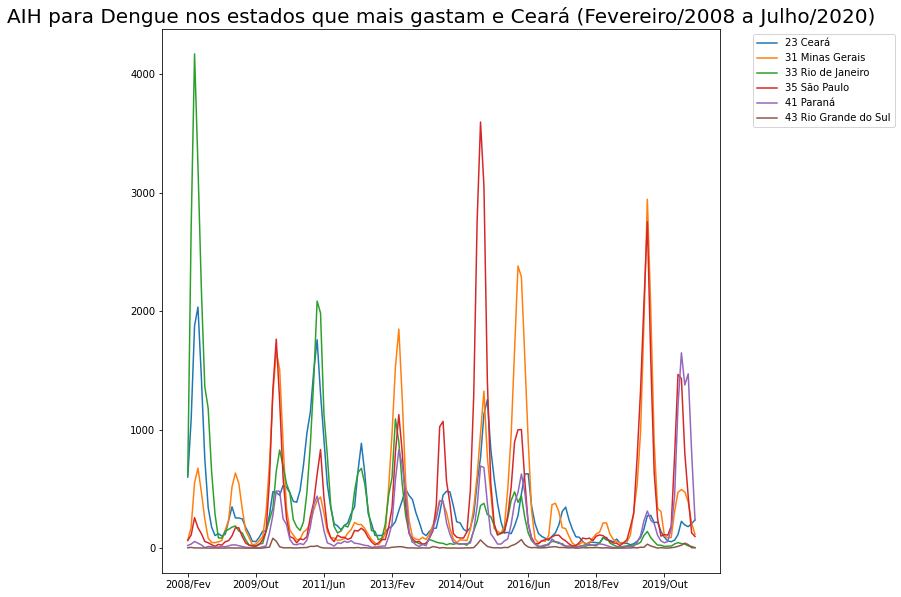

In [38]:
nome_estados_mais_gastam = estados_mais_gastam_e_ceara.index
dados_dengue.query('index in @nome_estados_mais_gastam').loc[:, dados_dengue.columns != 'Regioes'][colunas_meses].T.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('AIH para Dengue nos estados que mais gastam e Ceará (Fevereiro/2008 a Julho/2020)', fontsize=20)
plt.show()

Comparando relação gastos hospitalares e Internações por Dengue em São Paulo

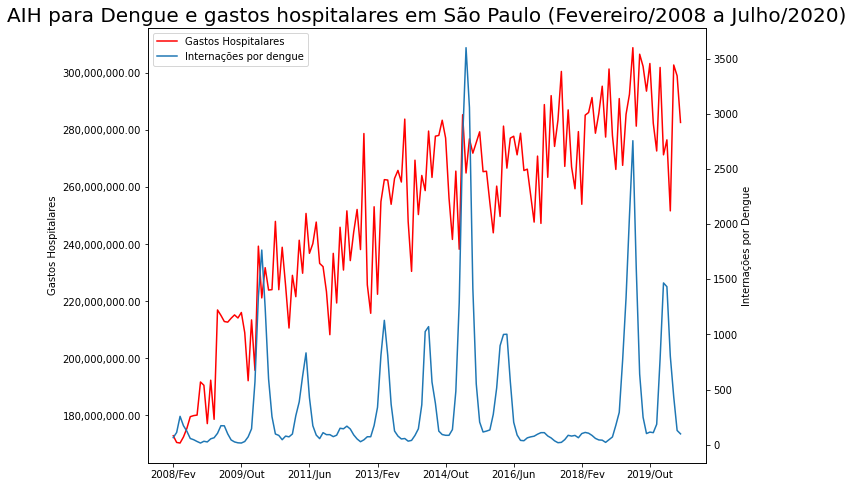

In [39]:
ax = dados_usaveis.loc[:, dados_usaveis.columns != 'Regioes'][colunas_meses].T['35 São Paulo'].plot(figsize=(10,8),color='red', label='Gastos Hospitalares')
dados_dengue.loc[:, dados_dengue.columns != 'Regioes'][colunas_meses].T['35 São Paulo'].plot(ax=ax,secondary_y=True, label='Internações por dengue')

ax.set_ylabel('Gastos Hospitalares')
ax.right_ax.set_ylabel('Internações por Dengue')

lines = ax.get_lines() + ax.right_ax.get_lines()

ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('AIH para Dengue e gastos hospitalares em São Paulo (Fevereiro/2008 a Julho/2020)', fontsize=20)
plt.show()

###Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

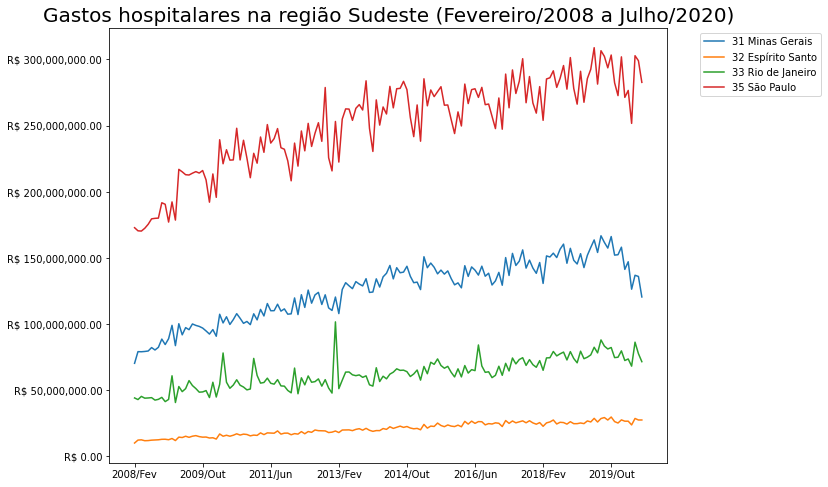

In [40]:
ax = dados_usaveis.query("Regioes == 'Sudeste'").loc[:, dados_usaveis.columns != 'Regioes'][colunas_meses].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Gastos hospitalares na região Sudeste (Fevereiro/2008 a Julho/2020)', fontsize=20)
plt.show()

Pelo gráfico acima não se observa um padrão aparente de pico em Fevereiro de 2013 nos estados do Sudeste.
No Espirito Santo, por exemplo não há momentos de grandes picos e se observarmos bem ,no Rio de Janeiro houve um pico em Janeiro e uma brusca queda em Fevereiro de 2013.

###Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

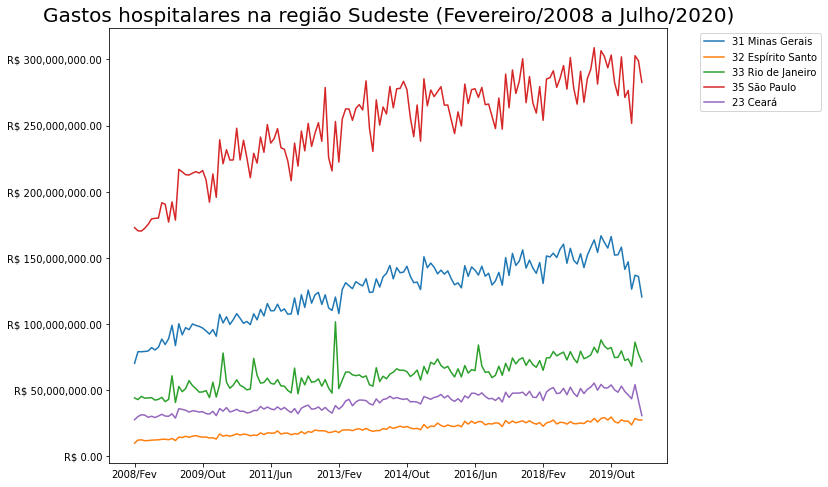

In [41]:
estados_sudeste = dados_usaveis.query("Regioes == 'Sudeste'")
estados_sudeste_e_ceara = estados_sudeste.append(dados_usaveis.loc['23 Ceará'])
ax = estados_sudeste_e_ceara.loc[:, dados_usaveis.columns != 'Regioes'][colunas_meses].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Gastos hospitalares na região Sudeste (Fevereiro/2008 a Julho/2020)', fontsize=20)
plt.show()

Assim como na análise anterior o Estado do Ceará também não apresenta um pico aparente em Fevereiro de 2013

##Aula 4

###Desafio 01: Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

Separar os 3 estados com maior gasto

In [42]:
top3_estados = estados_mais_gastam.loc[estados_mais_gastam.index[:3]]

retirar meses antes de 2012 e dividir os gastos para a escala de milhões

In [43]:
top3_estados = top3_estados[top3_estados.columns[:-1]] / 1000000
top3_estados

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
31 Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32


In [44]:
top3_estados_ultimos_anos = top3_estados[top3_estados.columns[47:-1]]
top3_estados_ultimos_anos

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,...,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,236.79,219.39,245.95,230.94,251.70,234.26,244.25,252.19,238.13,278.82,225.78,215.78,253.14,222.45,254.94,262.65,262.51,254.00,263.07,265.89,261.81,283.88,247.98,230.48,269.47,250.40,264.11,258.80,279.69,263.43,277.90,278.16,283.49,277.24,256.18,241.68,265.64,238.23,285.42,264.98,...,288.98,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06
31 Minas Gerais,119.73,107.15,122.16,112.57,125.67,115.76,122.01,123.93,114.79,122.10,112.21,110.27,120.41,107.89,126.12,131.25,128.91,126.75,132.08,130.22,128.83,134.28,123.89,124.21,134.16,127.95,135.67,138.38,144.30,134.14,142.60,138.77,139.26,143.68,136.08,131.24,131.70,126.04,150.88,142.58,...,150.24,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98
41 Paraná,74.22,72.97,80.91,78.14,85.40,77.80,83.52,83.84,79.19,84.99,78.73,71.09,81.23,73.98,83.93,91.66,87.75,87.79,91.30,92.87,88.69,92.45,82.39,76.98,85.54,82.97,88.17,86.56,92.57,87.77,94.61,91.49,91.34,94.90,87.57,80.30,83.54,79.57,97.76,89.98,...,119.14,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90


Manipulando os gráficos

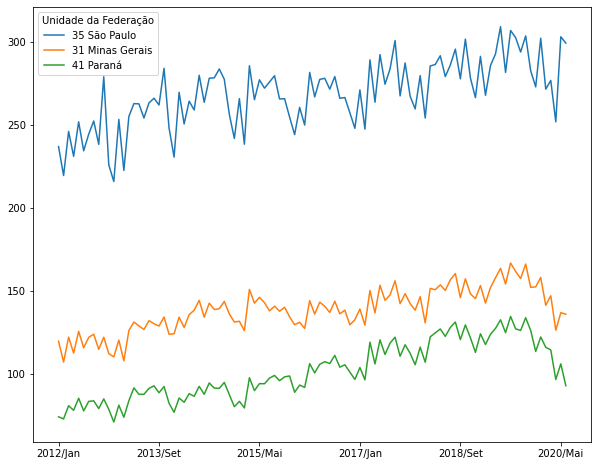

In [45]:
top3_estados_ultimos_anos.T.plot(figsize=(10,8))

Podemos ver nesse gráfico que **São Paulo** gastou **4 vezes mais** que o estado do **Paraná**.

Esse gráfico conta uma mentira. Devido o eixo y não iniciar em zero nos faz pensar o que foi afirmado acima.

Vamos corrigir colocando o eixo y para iniciar do zero e ver o que acontece.

Repetindo o gráfico anterior para facilitar a comparação

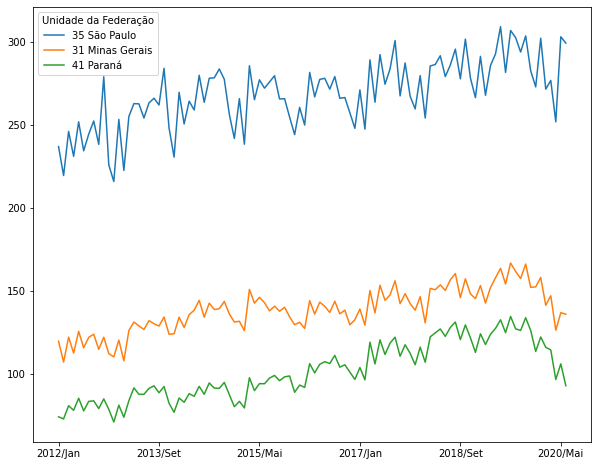

In [46]:
top3_estados_ultimos_anos.T.plot(figsize=(10,8))

(0.0, 350.0)

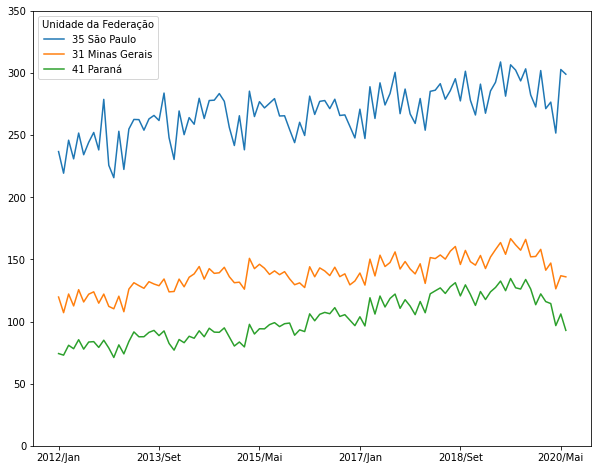

In [47]:
top3_estados_ultimos_anos.T.plot(figsize=(10,8))
plt.ylim(0,350)

Invertendo a tendencia

(0.0, 350.0)

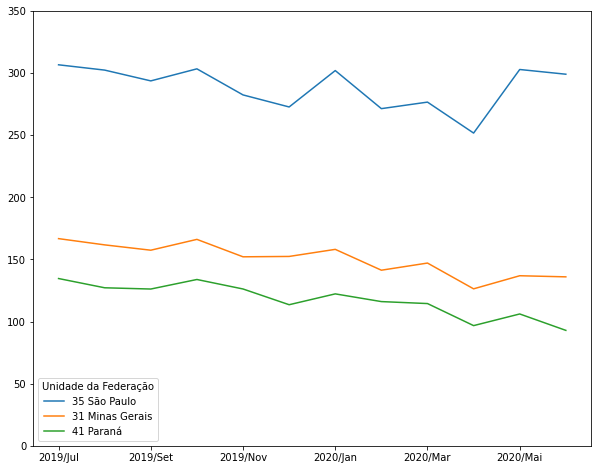

In [48]:
top3_estados_ultimos_anos.T[-12:].plot(figsize=(10,8))
plt.ylim(0,350)

(0.0, 350.0)

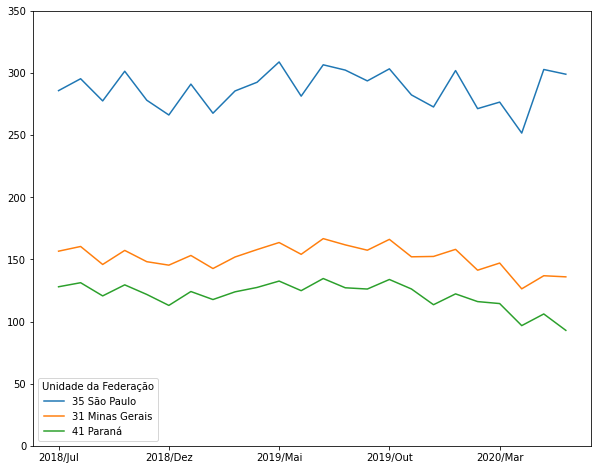

In [49]:
top3_estados_ultimos_anos.T[-24:].plot(figsize=(10,8))
plt.ylim(0,350)

(0.0, 350.0)

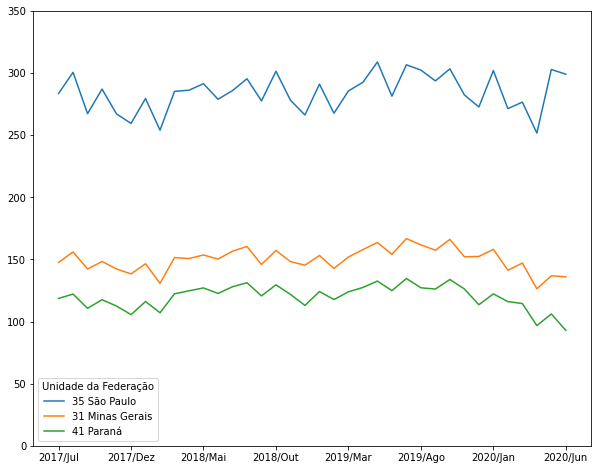

In [50]:
top3_estados_ultimos_anos.T[-36:].plot(figsize=(10,8))
plt.ylim(0,350)

(0.0, 350.0)

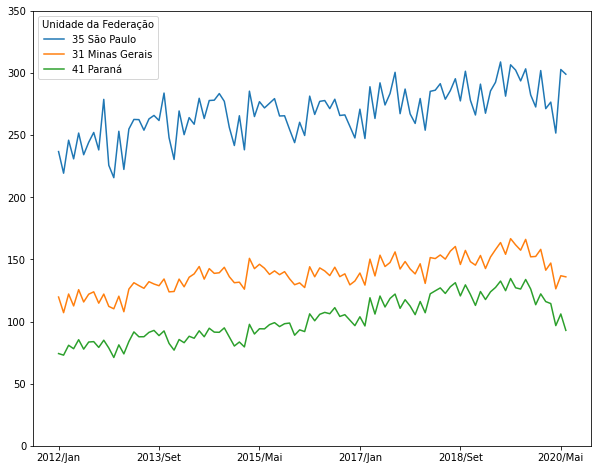

In [51]:
top3_estados_ultimos_anos.T.plot(figsize=(10,8))
plt.ylim(0,350)

###Desafio 02: Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

Mostrando apenas os dados que queremos, podemos mudar a história que os dados estão contando. No primeiro há nitidamente uma tendência de queda. No segundo e terceiro uma estabilidade nos gastos. E no último, com todos os dados, voltamos a ver nossa tendência de aumento nos gastos.

##Aula 5

Vamos trabalhar com o último mês

In [52]:
ultimo_mes = dados_usaveis.columns[-2:-1]
dados_mes_mais_recente = dados_usaveis[ultimo_mes]
dados_mes_mais_recente

,2020/Jul
Unidade da Federação,
11 Rondônia,7407388.24
12 Acre,1163813.08
13 Amazonas,13358514.02
14 Roraima,2739498.41
15 Pará,27618727.51
16 Amapá,2155083.37
17 Tocantins,4489665.87
21 Maranhão,24374205.15
22 Piauí,18019214.49


Plotar com o gráfico de pizza

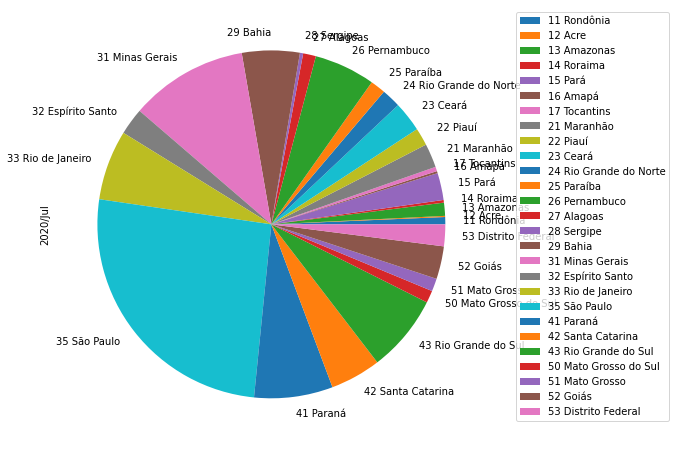

In [53]:
dados_mes_mais_recente.plot(kind='pie', subplots=True, figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

###Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Já fizemos isso. Acabamos nos adiantando logo nos gráficos da primeira aula. Portanto vou deixar aqui o link para a documentação do Matplotlib sobre grids.
* [Matplotlib - Grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

###Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [54]:
dados_mes_mais_recente = dados_usaveis[dados_usaveis.columns[-2:-1]]
dados_mes_mais_recente

,2020/Jul
Unidade da Federação,
11 Rondônia,7407388.24
12 Acre,1163813.08
13 Amazonas,13358514.02
14 Roraima,2739498.41
15 Pará,27618727.51
16 Amapá,2155083.37
17 Tocantins,4489665.87
21 Maranhão,24374205.15
22 Piauí,18019214.49


In [55]:
comparacao_com_ceara = ((dados_mes_mais_recente / dados_mes_mais_recente.loc['23 Ceará'] ) -1) * 100
comparacao_com_ceara

,2020/Jul
Unidade da Federação,
11 Rondônia,-75.96
12 Acre,-96.22
13 Amazonas,-56.64
14 Roraima,-91.11
15 Pará,-10.36
16 Amapá,-93.01
17 Tocantins,-85.43
21 Maranhão,-20.89
22 Piauí,-41.51


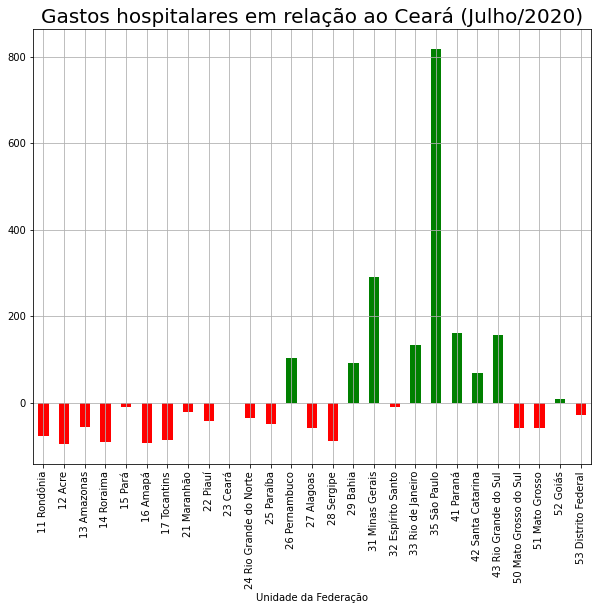

In [56]:
comparacao_com_ceara['positive'] = comparacao_com_ceara['2020/Jul'] > 0
comparacao_com_ceara['2020/Jul'].plot(kind='bar',
                                      figsize=(10,8),
                                      grid=True,
                                      color=comparacao_com_ceara.positive.map({True: 'g', False: 'r'}))
plt.legend().remove()
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Gastos hospitalares em relação ao Ceará (Julho/2020)', fontsize=20)
plt.show()

###Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

In [57]:
dados_populacao = pd.read_excel("https://github.com/johnatanDM/bootcamp-datascience-alura/blob/main/Dados/POP2020_20210331.xls?raw=true", skiprows=1, skipfooter=7)
dados_populacao.set_index('BRASIL E UNIDADES DA FEDERAÇÃO',drop=True, inplace=True)
dados_populacao = dados_populacao.drop([dados_populacao.columns[0]], axis=1)

dados_populacao

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Brasil,211755692
Região Norte,18672591
Rondônia,1796460
Acre,894470
Amazonas,4207714
Roraima,631181
Pará,8690745
Amapá,861773
Tocantins,1590248


Retirar Brasil e regiões

In [58]:
dados_populacao = dados_populacao.query("index != 'Brasil' and not index.str.contains('Região')", engine='python')

dados_populacao

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Rondônia,1796460
Acre,894470
Amazonas,4207714
Roraima,631181
Pará,8690745
Amapá,861773
Tocantins,1590248
Maranhão,7114598
Piauí,3.281.480(1)


retirar valores com parentesis

In [59]:
dados_populacao = dados_populacao.astype('string')

In [60]:
dados_populacao['POPULAÇÃO ESTIMADA'] = dados_populacao['POPULAÇÃO ESTIMADA'].str.replace('\(\d\)','').str.replace('.', '')
dados_populacao = dados_populacao.astype('int')
dados_populacao

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Rondônia,1796460
Acre,894470
Amazonas,4207714
Roraima,631181
Pará,8690745
Amapá,861773
Tocantins,1590248
Maranhão,7114598
Piauí,3281480


mudar indice para ficar igual ao dataset principal

In [61]:
dados_usaveis.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [62]:
index_estados = {
    'Rondônia':'11 Rondônia', 
    'Acre':'12 Acre', 
    'Amazonas':'13 Amazonas', 
    'Roraima':'14 Roraima', 
    'Pará':'15 Pará',
    'Amapá':'16 Amapá', 
    'Tocantins':'17 Tocantins', 
    'Maranhão':'21 Maranhão', 
    'Piauí':'22 Piauí', 
    'Ceará':'23 Ceará',
    'Rio Grande do Norte':'24 Rio Grande do Norte', 
    'Paraíba':'25 Paraíba', 
    'Pernambuco':'26 Pernambuco', 
    'Alagoas':'27 Alagoas',
    'Sergipe':'28 Sergipe', 
    'Bahia':'29 Bahia', 
    'Minas Gerais':'31 Minas Gerais', 
    'Espírito Santo':'32 Espírito Santo',
    'Rio de Janeiro':'33 Rio de Janeiro', 
    'São Paulo':'35 São Paulo', 
    'Paraná':'41 Paraná', 
    'Santa Catarina':'42 Santa Catarina',
    'Rio Grande do Sul':'43 Rio Grande do Sul', 
    'Mato Grosso do Sul':'50 Mato Grosso do Sul', 
    'Mato Grosso':'51 Mato Grosso',
    'Goiás':'52 Goiás', 
    'Distrito Federal':'53 Distrito Federal'
}

dados_populacao = dados_populacao.rename(index=index_estados)
dados_populacao

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
11 Rondônia,1796460
12 Acre,894470
13 Amazonas,4207714
14 Roraima,631181
15 Pará,8690745
16 Amapá,861773
17 Tocantins,1590248
21 Maranhão,7114598
22 Piauí,3281480


In [63]:
dados_mes_mais_recente = pd.concat([dados_mes_mais_recente, dados_populacao], axis=1)
dados_mes_mais_recente

,2020/Jul,POPULAÇÃO ESTIMADA
11 Rondônia,7407388.24,1796460
12 Acre,1163813.08,894470
13 Amazonas,13358514.02,4207714
14 Roraima,2739498.41,631181
15 Pará,27618727.51,8690745
16 Amapá,2155083.37,861773
17 Tocantins,4489665.87,1590248
21 Maranhão,24374205.15,7114598
22 Piauí,18019214.49,3281480
23 Ceará,30809221.22,9187103


In [64]:
dados_mes_mais_recente['Gasto/População'] = dados_mes_mais_recente['2020/Jul'] / dados_mes_mais_recente['POPULAÇÃO ESTIMADA']
dados_mes_mais_recente

,2020/Jul,POPULAÇÃO ESTIMADA,Gasto/População
11 Rondônia,7407388.24,1796460,4.12
12 Acre,1163813.08,894470,1.30
13 Amazonas,13358514.02,4207714,3.17
14 Roraima,2739498.41,631181,4.34
15 Pará,27618727.51,8690745,3.18
16 Amapá,2155083.37,861773,2.50
17 Tocantins,4489665.87,1590248,2.82
21 Maranhão,24374205.15,7114598,3.43
22 Piauí,18019214.49,3281480,5.49
23 Ceará,30809221.22,9187103,3.35


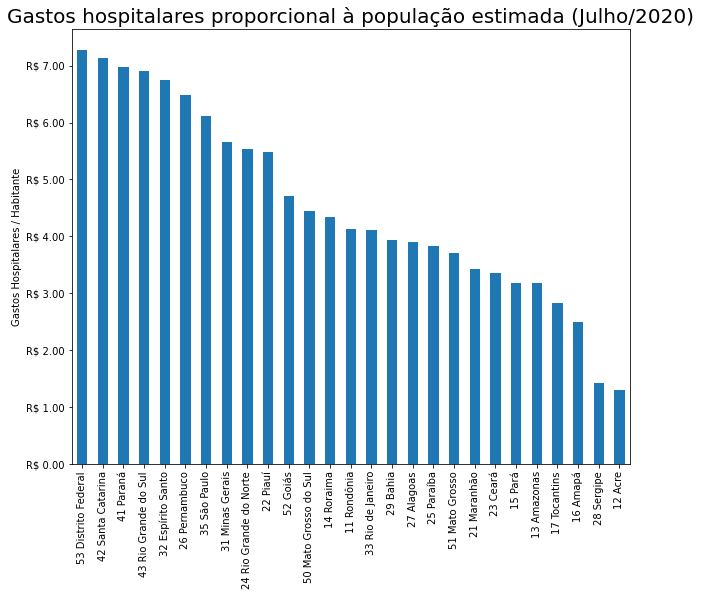

In [65]:
ax = dados_mes_mais_recente['Gasto/População'].sort_values(ascending=False).plot(kind='bar',figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title('Gastos hospitalares proporcional à população estimada (Julho/2020)', fontsize=20)
ax.set_ylabel('Gastos Hospitalares / Habitante')
plt.show()

###Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.
###Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

Primeiramente é importante ressaltar que os gráficos dessa aula foram focados no mês de Julho de 2020. Sendo esse, o último mês do dataset é quase certo que os dados estão incompletos, visto que o processamento das internações nesse período ocorrerão nos meses seguintes.

O gráfico "Gastos hospitalares em relação ao Ceará (Julho/2020)" me chamou atenção como os estados da região Norte e Nordeste têm gastos muito parecidos, muitos deles com gastos inferiores ao do estado do Ceará. Destacando-se apenas Pernambuco e Bahia, com gastos maiores que o Ceará.

Em contra partida, a primeira vista, logo se destaca o gasto de São Paulo, sendo cerca de 8 vezes mais que o estado do Ceará. Seguido por Minas Gerais e os outros estado no Sudeste e Sul. Tendo também uma exceção, o estado do Espirito Santo, que tem um gasto inferior ao do Ceará.

#Módulo 02 - VISUALIZAÇÃO DE DADOS COM SEABORN E MATPLOTLIB

##Aula 1

mostrar o gasto proporcional a cada estado, do mês mais recente 

In [66]:
dados_mes_mais_recente.head()

,2020/Jul,POPULAÇÃO ESTIMADA,Gasto/População
11 Rondônia,7407388.24,1796460,4.12
12 Acre,1163813.08,894470,1.30
13 Amazonas,13358514.02,4207714,3.17
14 Roraima,2739498.41,631181,4.34
15 Pará,27618727.51,8690745,3.18


In [67]:
dados_proporcionais = dados_mes_mais_recente['2020/Jul'] / dados_mes_mais_recente['2020/Jul'].sum()
dados_proporcionais = dados_proporcionais.sort_values(ascending=False)
dados_proporcionais

35 São Paulo             0.26
31 Minas Gerais          0.11
41 Paraná                0.07
43 Rio Grande do Sul     0.07
33 Rio de Janeiro        0.07
26 Pernambuco            0.06
29 Bahia                 0.05
42 Santa Catarina        0.05
52 Goiás                 0.03
23 Ceará                 0.03
15 Pará                  0.03
32 Espírito Santo        0.02
21 Maranhão              0.02
53 Distrito Federal      0.02
24 Rio Grande do Norte   0.02
22 Piauí                 0.02
25 Paraíba               0.01
13 Amazonas              0.01
27 Alagoas               0.01
51 Mato Grosso           0.01
50 Mato Grosso do Sul    0.01
11 Rondônia              0.01
17 Tocantins             0.00
28 Sergipe               0.00
14 Roraima               0.00
16 Amapá                 0.00
12 Acre                  0.00
Name: 2020/Jul, dtype: float64

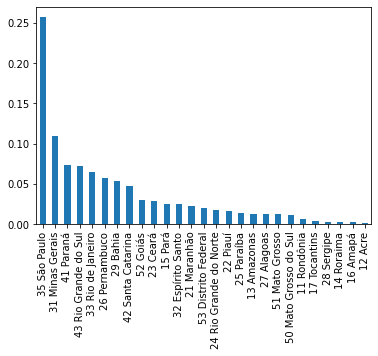

In [68]:
dados_proporcionais.plot(kind='bar')

ler dados da população copiando do wikipedia
com StringIO do io

In [69]:
str_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

In [70]:
populacao_io = StringIO(str_populacao)
populacao = pd.read_csv(populacao_io, delimiter='\t')
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


###Desafio 01: Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [71]:
URL='https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_população'


r = requests.get(URL)
website = r.text

tables = pd.read_html( website, encoding="UTF-8", match='São Paulo')

populacao_wiki = tables[0]
populacao_wiki


,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


###Desafio 02: Neste desafio temos uma série de passos:

* Padronizar os nomes das colunas
* Transformar os dados nos tipos corretos
* Transformar a UF em index

transformar a tabela do 
wikipedia em uma única coluna contendo a população e o dado com o tipo numérico e o indice ser a unidade federativa.

OBS: Utilizaremos a tabela copiada manualmente da wikipedia, devido a possibilidade da tabela copiada automaticamente ser alterada para valores mais atuais e estamos trabalhando com os dados de 2020.

In [72]:
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)


In [73]:
dados_mes_mais_recente.index = dados_mes_mais_recente.index.str[3:]
dados_mes_mais_recente.index

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object')

In [74]:
populacao = populacao.dropna()
populacao['populacao'] = populacao['População'].str.replace(" ", "").astype('int')

populacao['uf'] = populacao['Unidade federativa'].str.strip()

populacao.set_index('uf', inplace=True)

for estado in dados_mes_mais_recente.index:
  populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

populacao_estimada = populacao[populacao.columns[5:]]

display(populacao_estimada)

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


fazer o join dos dados mais recentes com o da população

In [75]:
dados_mes_mais_recente

,2020/Jul,POPULAÇÃO ESTIMADA,Gasto/População
Rondônia,7407388.24,1796460,4.12
Acre,1163813.08,894470,1.30
Amazonas,13358514.02,4207714,3.17
Roraima,2739498.41,631181,4.34
Pará,27618727.51,8690745,3.18
Amapá,2155083.37,861773,2.50
Tocantins,4489665.87,1590248,2.82
Maranhão,24374205.15,7114598,3.43
Piauí,18019214.49,3281480,5.49
Ceará,30809221.22,9187103,3.35


###Desafio 03: Buscar na documentação alguns métodos envolvendo strings

Segue o link da documentação do w3Schools com métodos envolvendo strings e alguns exemplos de uso:

[Documentação](https://www.w3schools.com/python/python_ref_string.asp)

Alguns métodos:
* capitalize()
* strip()
* upper()
* replace()

In [76]:
texto = 'esse texto servirá de exemplo    '

#capitalize - Deixa a primeira letra maiúscula
display(texto.capitalize())

#strip - retira os espaços em branco (espaços e tabs) do início e fim da string
display(texto.strip())

#upper - deixa todas as letras maiúsculas
display(texto.upper())

#replace - retorna uma string mudando um valor por outro
display(texto.replace('s', '$'))

'Esse texto servirá de exemplo    '

'esse texto servirá de exemplo'

'ESSE TEXTO SERVIRÁ DE EXEMPLO    '

'e$$e texto $ervirá de exemplo    '

###Desafio 04: Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [77]:
def limpa_e_junta_dados(dados, outra_tabela):
  populacao_io = StringIO(dados)
  populacao = pd.read_csv(populacao_io, delimiter='\t')

  populacao = populacao.dropna()
  populacao['populacao'] = populacao['População'].str.replace(" ", "").astype('int')

  populacao['uf'] = populacao['Unidade federativa'].str.strip()

  populacao.set_index('uf', inplace=True)

  for estado in outra_tabela.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

  populacao = populacao[populacao.columns[5:]]

  unida = populacao.join(outra_tabela)


  return populacao, unida

In [78]:
tf_populacao, tf_unida = limpa_e_junta_dados(str_populacao, dados_mes_mais_recente)
display(tf_populacao)
display(tf_unida)

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


,populacao,2020/Jul,POPULAÇÃO ESTIMADA,Gasto/População
uf,,,,
São Paulo,46289333,282709570.31,46289333,6.11
Minas Gerais,21292666,120467187.34,21292666,5.66
Rio de Janeiro,17366189,71540227.33,17366189,4.12
Bahia,14930634,58898100.40,14930634,3.94
Paraná,11516840,80320852.69,11516840,6.97
Rio Grande do Sul,11422973,78929703.81,11422973,6.91
Pernambuco,9616621,62325444.34,9616621,6.48
Ceará,9187103,30809221.22,9187103,3.35
Pará,8690745,27618727.51,8690745,3.18


##Aula 2

###Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

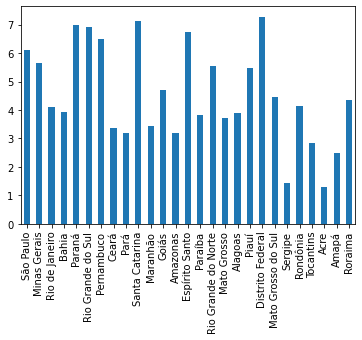

In [79]:
dados_mes_mais_recente.sort_values('POPULAÇÃO ESTIMADA', ascending=False)['Gasto/População'].plot(kind='bar')

usando o seaborn plotar o scatterplot 
população por gasto

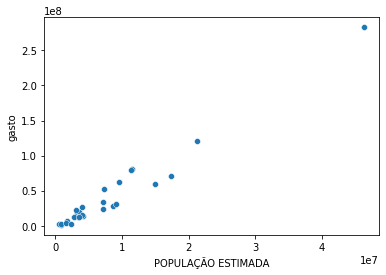

In [80]:
dados_mes_mais_recente['gasto'] = dados_mes_mais_recente['2020/Jul']
sns.scatterplot(data=dados_mes_mais_recente, x='POPULAÇÃO ESTIMADA',y='gasto' )


plotar população por gasto por habitante

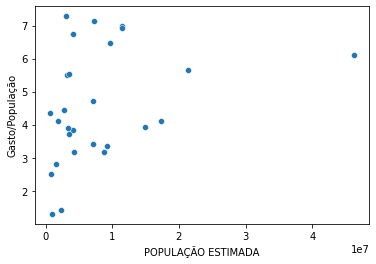

In [81]:
sns.scatterplot(data=dados_mes_mais_recente, x='POPULAÇÃO ESTIMADA', y='Gasto/População')

###Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [82]:
mes_anterior = dados_usaveis[dados_usaveis.columns[-3:-2]]
mes_anterior.index = mes_anterior.index.str[3:]
_,dados_mes_anterior = limpa_e_junta_dados(str_populacao, mes_anterior)

dados_mes_anterior['gasto/populacao'] = dados_mes_anterior['2020/Jun'] / dados_mes_anterior['populacao']
display(dados_mes_anterior) 

,populacao,2020/Jun,gasto/populacao
uf,,,
São Paulo,46289333,299060851.62,6.46
Minas Gerais,21292666,135977571.87,6.39
Rio de Janeiro,17366189,77604925.21,4.47
Bahia,14930634,65159300.63,4.36
Paraná,11516840,92901461.36,8.07
Rio Grande do Sul,11422973,89019478.82,7.79
Pernambuco,9616621,68145110.59,7.09
Ceará,9187103,42146555.81,4.59
Pará,8690745,35396030.78,4.07


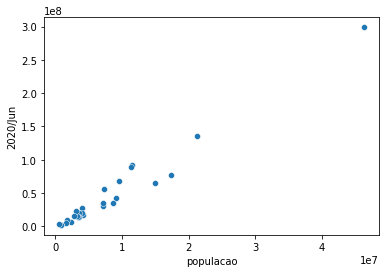

In [83]:
sns.scatterplot(data=dados_mes_anterior, x='populacao',y='2020/Jun' )

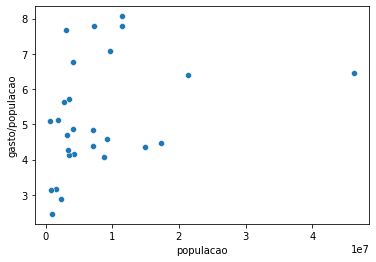

In [84]:
sns.scatterplot(data=dados_mes_anterior, x='populacao', y='gasto/populacao')

###Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

In [85]:
dados_mes_mais_recente['populacao'] = dados_mes_mais_recente['POPULAÇÃO ESTIMADA']
dados_mes_mais_recente['gasto/populacao - Jul'] = dados_mes_mais_recente['Gasto/População']
dados_mes_mais_recente_formatado = dados_mes_mais_recente[['populacao', '2020/Jul', 'gasto/populacao - Jul']]
dados_mes_anterior_formatado = dados_mes_anterior.rename(columns = {'gasto/populacao':'gasto/populacao - Jun'})

gasto_dois_meses = dados_mes_anterior_formatado[['populacao', '2020/Jun']].join(dados_mes_mais_recente_formatado['2020/Jul'])
gasto_populacao_dois_meses = dados_mes_anterior_formatado[['populacao', 'gasto/populacao - Jun']].join(dados_mes_mais_recente_formatado['gasto/populacao - Jul'])


display(gasto_dois_meses.head())
display(gasto_populacao_dois_meses.head())
display(dados_mes_mais_recente_formatado.head())
display(dados_mes_anterior_formatado.head())

,populacao,2020/Jun,2020/Jul
uf,,,
São Paulo,46289333,299060851.62,282709570.31
Minas Gerais,21292666,135977571.87,120467187.34
Rio de Janeiro,17366189,77604925.21,71540227.33
Bahia,14930634,65159300.63,58898100.40
Paraná,11516840,92901461.36,80320852.69


,populacao,gasto/populacao - Jun,gasto/populacao - Jul
uf,,,
São Paulo,46289333,6.46,6.11
Minas Gerais,21292666,6.39,5.66
Rio de Janeiro,17366189,4.47,4.12
Bahia,14930634,4.36,3.94
Paraná,11516840,8.07,6.97


,populacao,2020/Jul,gasto/populacao - Jul
Rondônia,1796460,7407388.24,4.12
Acre,894470,1163813.08,1.30
Amazonas,4207714,13358514.02,3.17
Roraima,631181,2739498.41,4.34
Pará,8690745,27618727.51,3.18


,populacao,2020/Jun,gasto/populacao - Jun
uf,,,
São Paulo,46289333,299060851.62,6.46
Minas Gerais,21292666,135977571.87,6.39
Rio de Janeiro,17366189,77604925.21,4.47
Bahia,14930634,65159300.63,4.36
Paraná,11516840,92901461.36,8.07


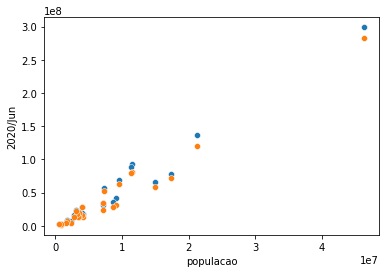

In [86]:
ax = sns.scatterplot(data=gasto_dois_meses, x='populacao', y='2020/Jun')
ax = sns.scatterplot(data=gasto_dois_meses, x='populacao', y='2020/Jul')

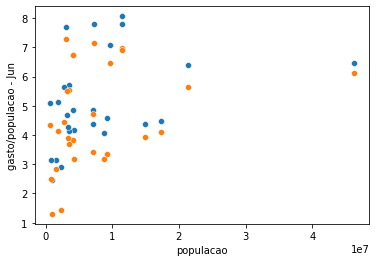

In [87]:
ax = sns.scatterplot(data=gasto_populacao_dois_meses, x='populacao', y='gasto/populacao - Jun')
ax = sns.scatterplot(data=gasto_populacao_dois_meses, x='populacao', y='gasto/populacao - Jul')

###Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

Os dois gráficos mostram que os dados seguem a mesma tendência, mas acredito que isso é esperado, visto que dividimos os dados pelo mesmo valor de população.